Homework 1: Image Processing
==========

> **Submission Instructions:** Before the deadline, export the completed notebook to PDF and upload it to GradeScope. The PDF should clearly show your code, and the result of running the code. Check the PDF to ensure that it is readable, the font-size is not small, and no information is cut-off. There will be no make-ups or extensions for corrupted/damaged/unreadable PDFs.

**Names of Collaborators**:

The below commands will download the images needed for this problem set. Make sure you run it before you get started.

In [27]:
!wget -qN https://www.cs.columbia.edu/~vondrick/class/coms4732/hw1/noisy_image.jpg
!wget -qN https://www.cs.columbia.edu/~vondrick/class/coms4732/hw1/edge_detection_image.jpg
!wget -qN https://www.cs.columbia.edu/~vondrick/class/coms4732/hw1/cat.jpg
!wget -qN https://www.cs.columbia.edu/~vondrick/class/coms4732/hw1/dog.jpg

Problem 1: Image Denoising
==========================

Taking pictures at night is challenging because there is less light that hits the film or camera sensor. To still capture an image in low light, we need to change our camera settings to capture more light. One way is to increase the exposure time, but if there is motion in the scene, this leads to blur. Another way is to use sensitive film that still responds to low intensity light. However, the trade-off is that this higher sensitivity increases the amount of noise captured, which often shows up as grain on photos. In this problem, your task is to clean up the noise with signal processing.



Visualizing the Grain
---------------------
To start off, let's load up the image and visualize the image we want to denoise.

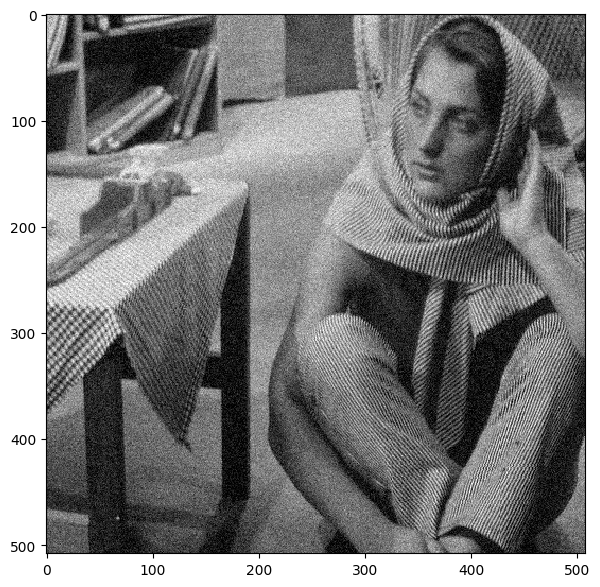

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from IPython import display
from scipy.signal import convolve2d
from math import *
import time
%matplotlib inline

path_to_noisy_image = '/Users/rajmani/Documents/research/Home/python/computer-vision/homeworks/hw1/noisy_image.jpg'

plt.rcParams['figure.figsize'] = [7, 7]

def load_image(filename):
    img = np.asarray(Image.open(filename))
    img = img.astype("float32") / 255.
    return img

def gray2rgb(image):
    return np.repeat(np.expand_dims(image, 2), 3, axis=2)

def show_image(img):
    if len(img.shape) == 2:
        img = gray2rgb(img)
    plt.imshow(img, interpolation='nearest')

# load the image
im = load_image(path_to_noisy_image)
im = im.mean(axis=2) # convert to grayscale
show_image(im)

Problem 1a: Mean Filter using "for" loop
-----------------------------------------

Let's try to remove this grain with a mean filter. For every pixel in the image, we want to take an average (mean) of the neighboring pictures. Implement this operation using "for" loops and visualize the result:

In [12]:
im_pad = np.pad(im, 5, mode='constant')  # pad the border of the original image
im_out = np.zeros_like(im)  # initialize the output image array

''' TODO: Implement a mean filter using "for" loop here (modify the im_out matrix). '''
def mean_filter(image, im_out, k=3):
    height, width = image.shape
    mid = k // 2
    for i in range(height - k + 1):
        for j in range(width - k + 1):
            im_out[i:k+i, j:k+j][mid, mid] = image[i:k+i, j:k+j].mean()


In [20]:
mean_filter(im, im_out, 3)

In [21]:
im_out

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.6862745 , 0.7302832 , ..., 0.35468408, 0.33464056,
        0.        ],
       [0.        , 0.67407405, 0.7111111 , ..., 0.3150327 , 0.29542485,
        0.        ],
       ...,
       [0.        , 0.29411766, 0.30893245, ..., 0.37167755, 0.395207  ,
        0.        ],
       [0.        , 0.28801742, 0.29411766, ..., 0.38779956, 0.42047933,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

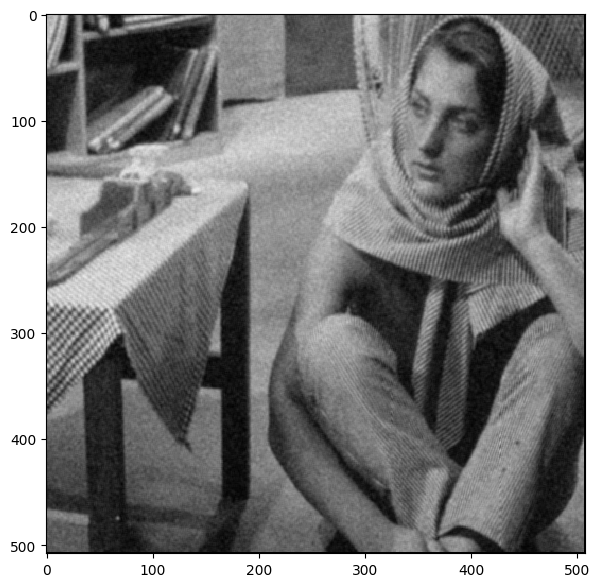

In [22]:


show_image(im_out)

Problem 1b: Implement the `convolve_image` function.
-----------

Convolution provides a mathematical way to apply filters to image. Implement the `convolve_image` function below using `for` loops. Your function should accept an image and a filter matrix, and return the result of convoling the image with the given filter matrix. Note: You cannot use a built-in convolution routine for this problem.

In [32]:
def convolve_image(image_main, filter_matrix):
    ''' Convolve a 2D image using the filter matrix.
    Args:
        image: a 2D numpy array.
        filter_matrix: a 2D numpy array.
    Returns:
        the convolved image, which is a 2D numpy array same size as the input image.
        
    TODO: Implement the convolve_image function here. 
    '''
    final_image = np.zeros_like(image_main)
    kernel_dim = filter_matrix.shape[0]
    k = kernel_dim
    pad = (kernel_dim - 1) // 2
    image_main = np.pad(image_main, [(pad, pad)], mode="constant")
    height, width = image_main.shape
    filter_matrix = np.fliplr(np.flipud(filter_matrix))
    for i in range(height - k + 1):
        for j in range(width - k + 1):
            final_image[i, j] = (
                image_main[i : k + i, j : k + j].ravel().dot(filter_matrix.ravel())
            )

    return final_image

In [33]:
import scipy as sp 


Problem 1c: Mean Filter with Convolution
----------------------------

Implement this same operation with a convolution instead. Fill in the mean filter matrix here, and visualize the convolution result.

In [34]:
mean_filt = np.ones(9).reshape(3, 3) * 1/ 9 


Apply mean filter convolution using your `convolve_image` function and the `mean_filt` matrix.

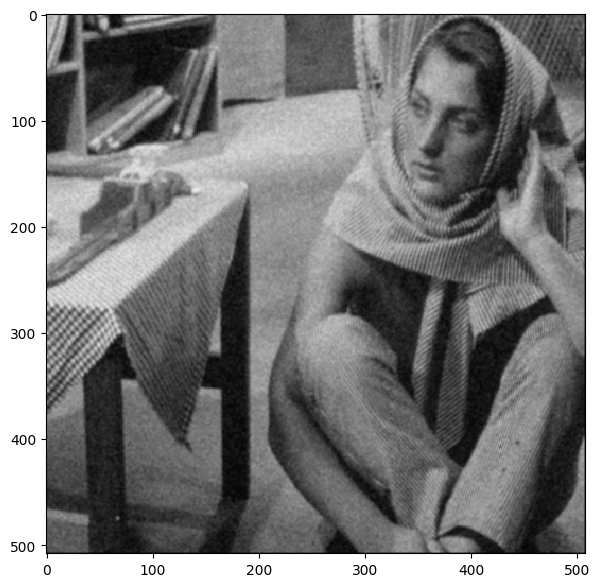

In [35]:
show_image(convolve_image(im, mean_filt))

Compare your convolution result with the `scipy.signal.convolve2d` function (they should look the same).

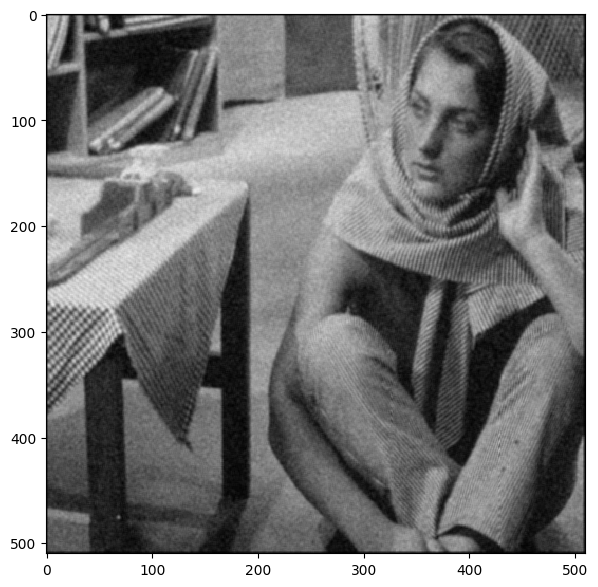

In [36]:
show_image(convolve2d(im, mean_filt))

Note: In the sections below, we will use the `scipy.signal.convolve2d` function for grading. But fill free to test your `convolve_image` function on other filters as well.

Problem 1d: Gaussian Filter
---------------

Instead of using a mean filter, let's use a Gaussian filter. Create a 2D Gaussian filter, and plot the result of the convolution.

Hint: You can first construct a one dimensional Gaussian, then use it to create a 2D dimensional Gaussian. 

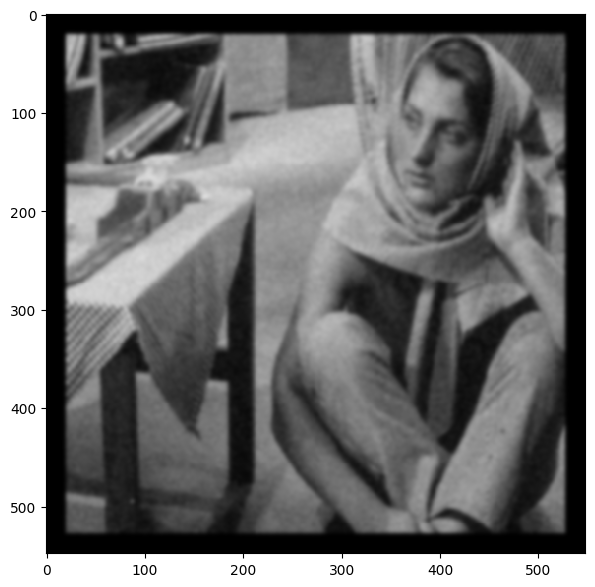

In [37]:
def gaussian_filter(sigma, k=20):
    ''' 
    Args:
        sigma: the standard deviation of Gaussian kernel.
        k: controls size of the filter matrix. 
    Returns:
        a 2D Gaussian filter matrix of the size (2k+1, 2k+1).
        
    TODO: Implement a Gaussian filter here. 
    '''
    denom = 2 * sigma**2
    scale = 2 * np.pi * sigma**2
    oned_gauss = [np.exp(-x**2 / denom) / np.sqrt(scale) for x in range(-k, k + 1)]
    return np.outer(oned_gauss, oned_gauss)

show_image(convolve2d(im, gaussian_filter(2)))

The amount the image is blurred changes depending on the sigma parameter. Change the sigma parameter to see what happens. Try a few different values.

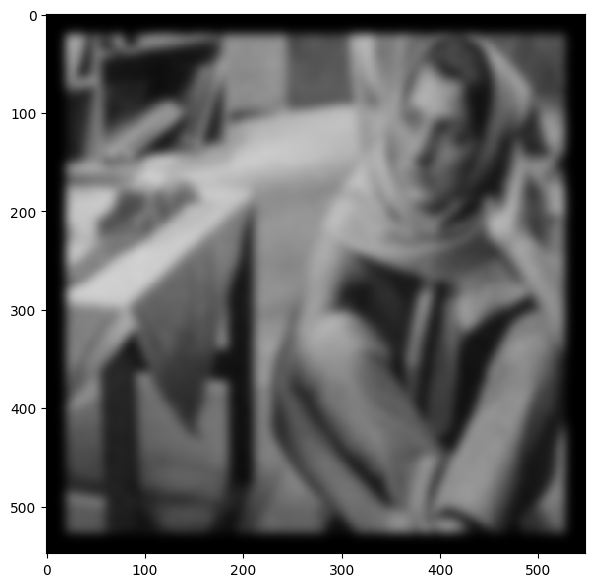

In [38]:
show_image(convolve2d(im, gaussian_filter(5)))

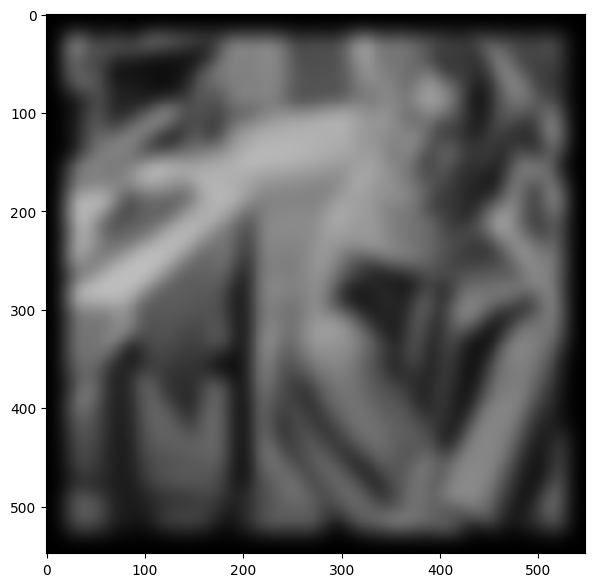

In [39]:
show_image(convolve2d(im, gaussian_filter(10)))

Problem 1e: Visualizing Gaussian Filter
---------------------------
Try changing the sigma parameter below to visualize the Gaussian filter directly. This gives you an idea of how different sigma values create different convolved images. 

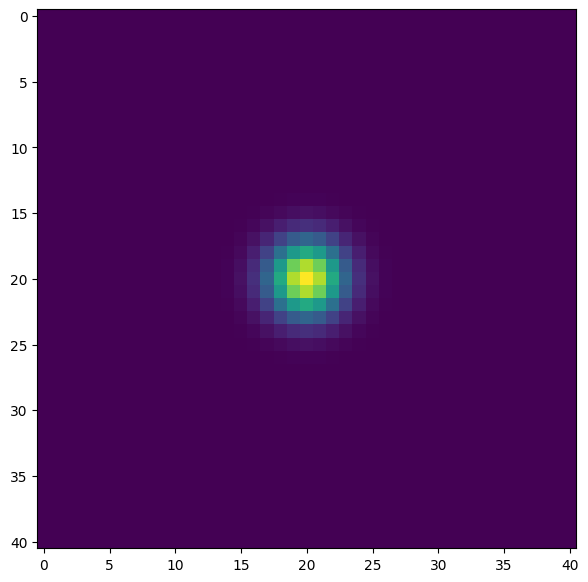

In [40]:
plt.imshow(gaussian_filter(sigma=2))

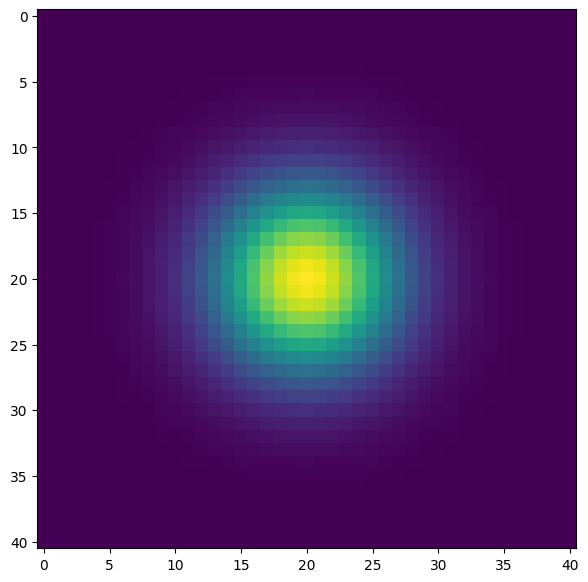

In [41]:
plt.imshow(gaussian_filter(sigma=5))

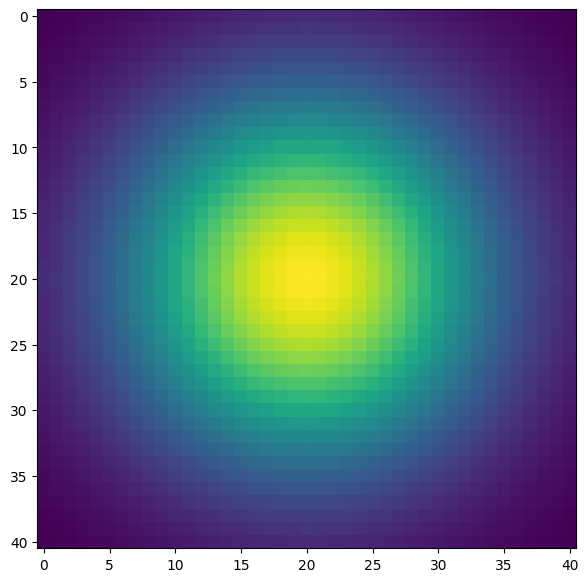

In [42]:
plt.imshow(gaussian_filter(sigma=10))

Problem 2: Edge Detection
=========================

There are a variety of filters that we can use for different tasks. One such task is edge detection, which is useful for finding the boundaries regions in an image. In this part, your task is to use convolutions to find edges in images. Let's first load up an edgy image.

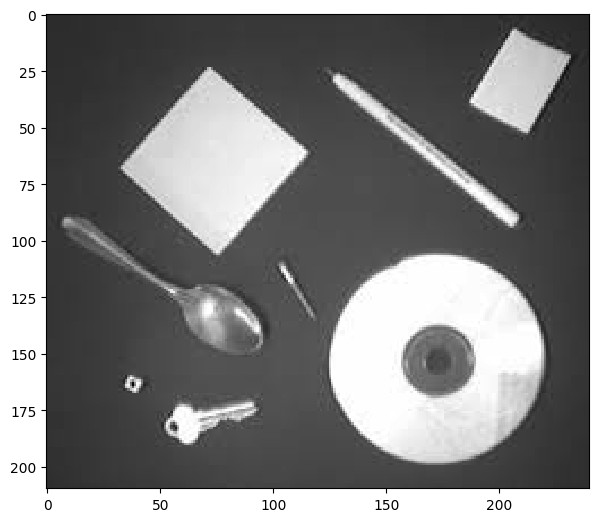

In [43]:
path_to_edge_image = '/Users/rajmani/Documents/research/Home/python/computer-vision/homeworks/hw1/edge_detection_image.jpg'
im = load_image(path_to_edge_image)
im = im.mean(axis=2) # convert to grayscale
show_image(im)

Problem 2a: Image Gradient Filters
----------------------------------

Implement a filter to detect gradients, and convolve it with the image.  Show the result.

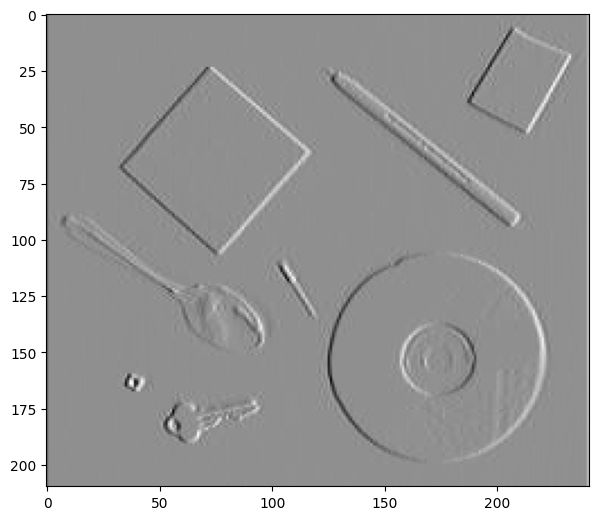

In [44]:
filtx = np.array([[-1, 1]])
#filty = np.array([[1, 1], [-1, -1]])
plt.imshow(convolve2d(im, filtx), cmap='gray')

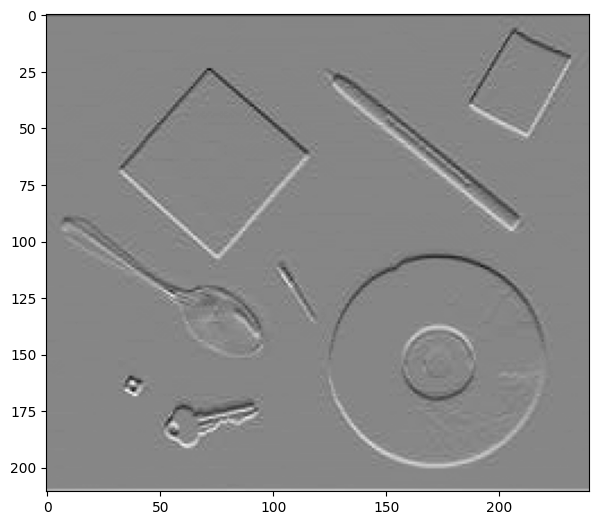

In [45]:
plt.imshow(convolve2d(im, filtx.T), cmap='gray')

Noise
-----

The issue with the basic gradient filters is that it is sensitive to noise in the image. Let's add some Gaussian noise to the image below, and visualize what happens. The edges should be hard to see.

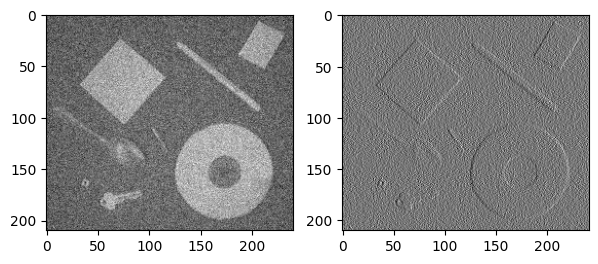

In [46]:
im = load_image(path_to_edge_image)
im = im.mean(axis=2)
im = im + 0.2*np.random.randn(*im.shape)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(im, cmap='gray')
axarr[1].imshow(convolve2d(im, filtx), cmap='gray')

Problem 2b: Laplacian Filters
-----------------

Laplacian filters are edge detectors that are robust to noise (Why is this? Think about how the filter is constructed.). Implement a Laplacian filter below for both horizontal and vertical edges.

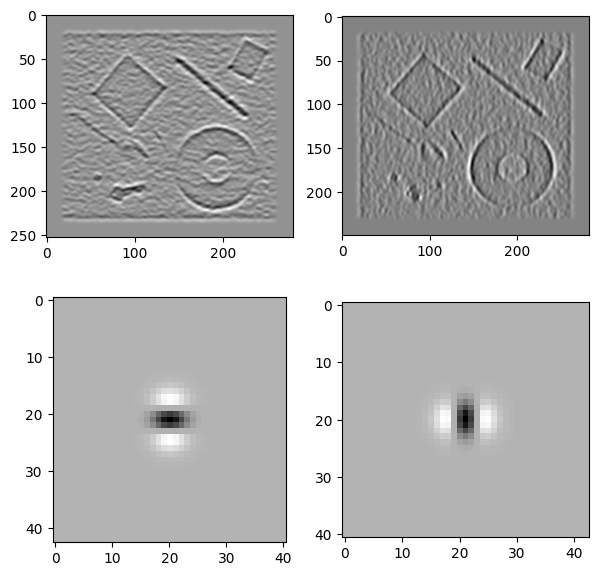

In [47]:
lap_x_filt = convolve2d(convolve2d(gaussian_filter(2), filtx) , filtx) 
lap_y_filt = convolve2d(convolve2d(gaussian_filter(2), filtx.T) , filtx.T) 

f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(convolve2d(im, lap_y_filt), cmap='gray')
axarr[0,1].imshow(convolve2d(im, lap_x_filt), cmap='gray')
axarr[1,0].imshow(lap_y_filt, cmap='gray')
axarr[1,1].imshow(lap_x_filt, cmap='gray')

Problem 3: Hybrid Images
========================

Hybrid images is a technique to combine two images in one. Depending on the distance you view the image, you will see a different image. This is done by merging the high-frequency components of one image with the low-frequency components of a second image. In this problem, you are going to use the Fourier transform to make these images. But first, let's visualize the two images we will merge together.

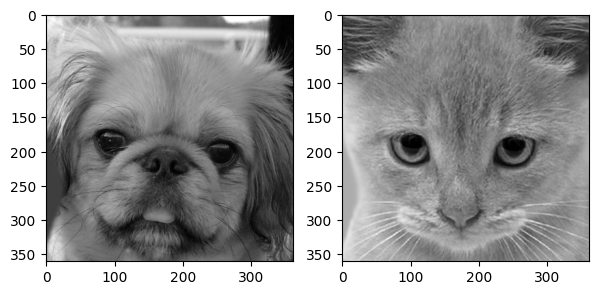

In [48]:
from numpy.fft import fft2, fftshift, ifftshift, ifft2
path_to_dog_image = '/Users/rajmani/Documents/research/Home/python/computer-vision/homeworks/hw1/dog.jpg'
path_to_cat_image = '/Users/rajmani/Documents/research/Home/python/computer-vision/homeworks/hw1/cat.jpg'
dog = load_image(path_to_dog_image).mean(axis=-1)[:, 25:-24]
cat = load_image(path_to_cat_image).mean(axis=-1)[:, 25:-24]

f, axarr = plt.subplots(1,2)
axarr[0].imshow(dog, cmap='gray')
axarr[1].imshow(cat, cmap='gray')

Problem 3a: Fourier Transform
-----------------

In the code box below, compute the Fourier transform of the two images. You can use the fft2 function. You can also use the fftshift function, which may help in the next section.

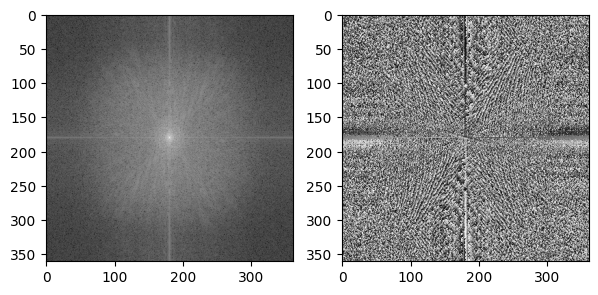

In [49]:

cat_fft = np.fft.fftshift(np.fft.fft2(cat))
dog_fft = np.fft.fftshift(np.fft.fft2(dog))

# Visualize the magnitude and phase of cat_fft. This is a complex number, so we visualize
# the magnitude and angle of the complex number.
# Curious fact: most of the information for natural images is stored in the phase (angle).
f, axarr = plt.subplots(1,2)
axarr[0].imshow(np.log(np.abs(cat_fft)), cmap='gray')
axarr[1].imshow(np.angle(cat_fft), cmap='gray')

Problem 3b: Low and High Pass Filters
-------------------------

By masking the Fourier transform, you can compute both low and high pass of the images. In Fourier space, write code below to create the mask for a high pass filter of the cat, and the mask for a low pass filter of the dog. Then, convert back to image space and visualize these images.

You may need to use the functions ifft2 and ifftshift.

In [50]:
def circular_mask(height, width):
    center = (height // 2, width // 2)
    radius = height // 25
    Y, X = np.ogrid[:height, :width]
    xnorm = (X - center[0]) ** 2
    ynorm = (Y - center[1]) ** 2
    dist_from_center = np.sqrt(xnorm + ynorm)
    mask = dist_from_center <= radius
    return mask

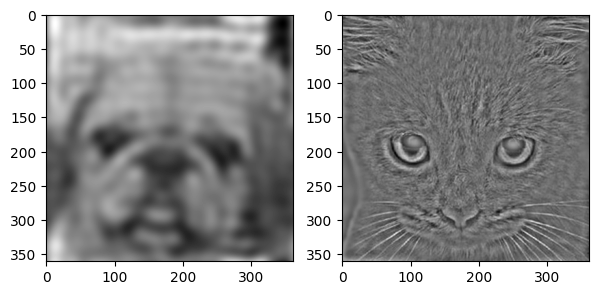

In [51]:
high_mask = np.where(circular_mask(*cat_fft.shape) == False, True, False)
low_mask = circular_mask(*dog_fft.shape)

''' TODO: Apply the high pass filter on the cat and convert back to image space. '''
cat_filtered = ifft2(ifftshift(cat_fft * high_mask)).real
''' TODO: Apply the low pass filter on the dog and convert back to image space. ''' 
dog_filtered = ifft2(ifftshift(dog_fft * low_mask)).real

f, axarr = plt.subplots(1,2)
axarr[0].imshow(dog_filtered, cmap='gray')
axarr[1].imshow(cat_filtered, cmap='gray')

Problem 3c: Hybrid Image Results
--------------------

Now that we have the high pass and low pass fitlered images, we can create a hybrid image by adding them. Write the code to combine the images below, and visualize the hybrd image.

Depending on whether you are close or far away from your monitor, you should see either a cat or a dog.  Try creating a few different hybrid images from your own photos or photos you found. Submit them, and we will show the coolest ones in class.

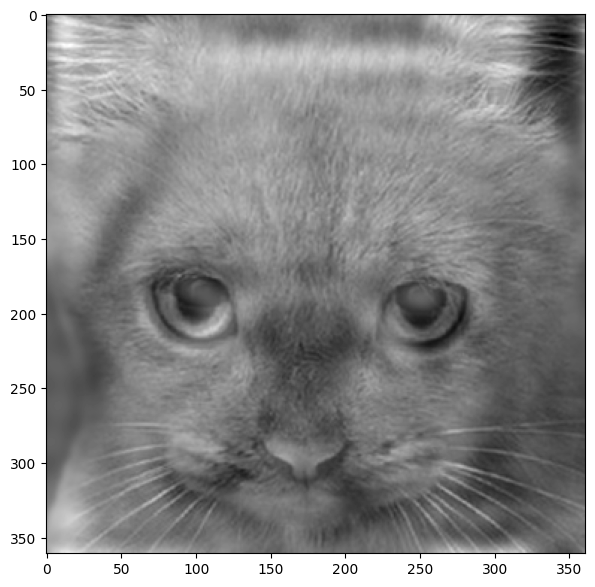

In [52]:
hybrid = cat_filtered + dog_filtered

plt.imshow(hybrid, cmap='gray')

Acknowledgements
----------------

This homework is based on assignments from Aude Oliva at MIT, and James Hays at Georgia Tech. 